# Build a Baseline Model

In [70]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
sns.set()

In [51]:
# read in the data
titanic = pd.read_csv('../data/train.csv')

In [53]:
X = titanic.drop('Survived', axis = 1) # matrix
y = titanic['Survived'] # vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 
# 80% training, 20% testing, random_state is a random seed so we will always have the same data  
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712,), (179,))

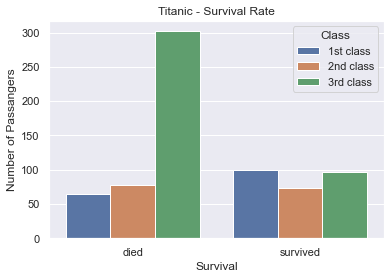

In [72]:
# Trainings Data 
df_training = pd.concat([X_train, y_train], axis = 1)

sns.countplot(x = 'Survived', 
              hue = 'Pclass', 
              data = df_training)
plt.title('Titanic - Survival Rate - Training Data')
plt.xticks([0,1], ['died', 'survived'])
plt.ylabel('Number of Passangers')
plt.xlabel('Survival')
plt.legend(title='Class', 
           loc='upper right', 
           labels=['1st class', '2nd class', '3rd class'])
plt.show()

### Model Dummy Classifier: most_frequent

In [55]:
model = DummyClassifier(strategy='most_frequent')
model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

### Evaluate the model

In [56]:
round(model.score(X_train, y_train), 3)

0.624

In [57]:
round(model.score(X_test, y_test), 3)

0.587

In [79]:
y_pred = model.predict(X_test)

# Prediction Data with model most_frequent 
df_pred = X_test.iloc[::]
df_pred['Survived']= y_pred
df_pred.shape

(179, 12)

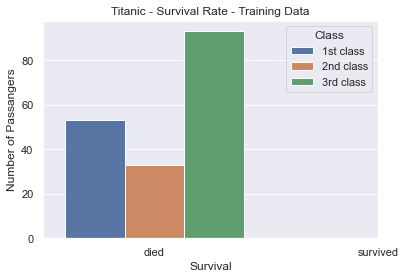

In [80]:
sns.countplot(x = 'Survived', 
              hue = 'Pclass', 
              data = df_pred)
plt.title('Titanic - Survival Rate - Training Data')
plt.xticks([0,1], ['died', 'survived'])
plt.ylabel('Number of Passangers')
plt.xlabel('Survival')
plt.legend(title='Class', 
           loc='upper right', 
           labels=['1st class', '2nd class', '3rd class'])
plt.show()

### Model Dummy Classifier: stratified

In [58]:
model2 = DummyClassifier(strategy='stratified')
model2.fit(X_train, y_train)

DummyClassifier(strategy='stratified')

In [62]:
round(model2.score(X_train, y_train), 3)

0.546

In [61]:
round(model2.score(X_test, y_test),3)

0.475

In [81]:
y_pred2 = model2.predict(X_test)

In [82]:
df_pred2 = X_test.iloc[::]
df_pred2['Survived'] = y_pred2

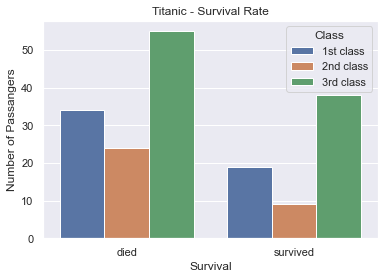

In [83]:
sns.countplot(x = 'Survived', 
              hue = 'Pclass', 
              data = df_pred2)
plt.title('Titanic - Survival Rate')
plt.xticks([0,1], ['died', 'survived'])
plt.ylabel('Number of Passangers')
plt.xlabel('Survival')
plt.legend(title='Class', 
           loc='upper right', 
           labels=['1st class', '2nd class', '3rd class'])
plt.show()